## Importing neccessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

## Loading data frame

In [2]:
weather=pd.read_csv(R"K:\Desktop\NIIT\tables\DS3_C1_S2_Weather_Data_Practice.csv",parse_dates=["Date"])

In [3]:
weather.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## Task 1 : Rolling average

Text(0.5, 1.0, 'Moving avg')

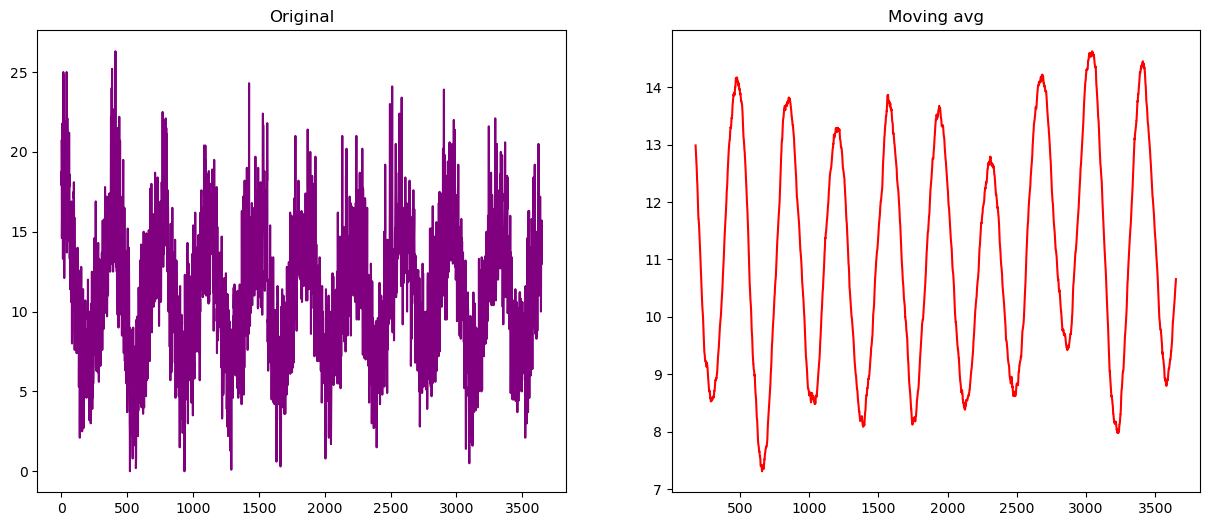

In [4]:
moving_avg=weather.Temp.rolling(window=180).mean()
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(weather.Temp,c='purple',label = 'Actual')
axes[0].set_title('Original')
axes[1].plot(moving_avg,c='Red',label='Moving Average')
axes[1].set_title('Moving avg')

## Task 2 : To identify Trend seasonality and Residual

In [5]:
components=seasonal_decompose(weather.Temp,period=300)

In [6]:
weather.set_index("Date",inplace=True)
weather

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


## Splitting components

In [7]:
Trend=components.trend
Resid=components.resid
Season=components.seasonal

## Plotting components

Text(0.5, 1.0, 'Resid')

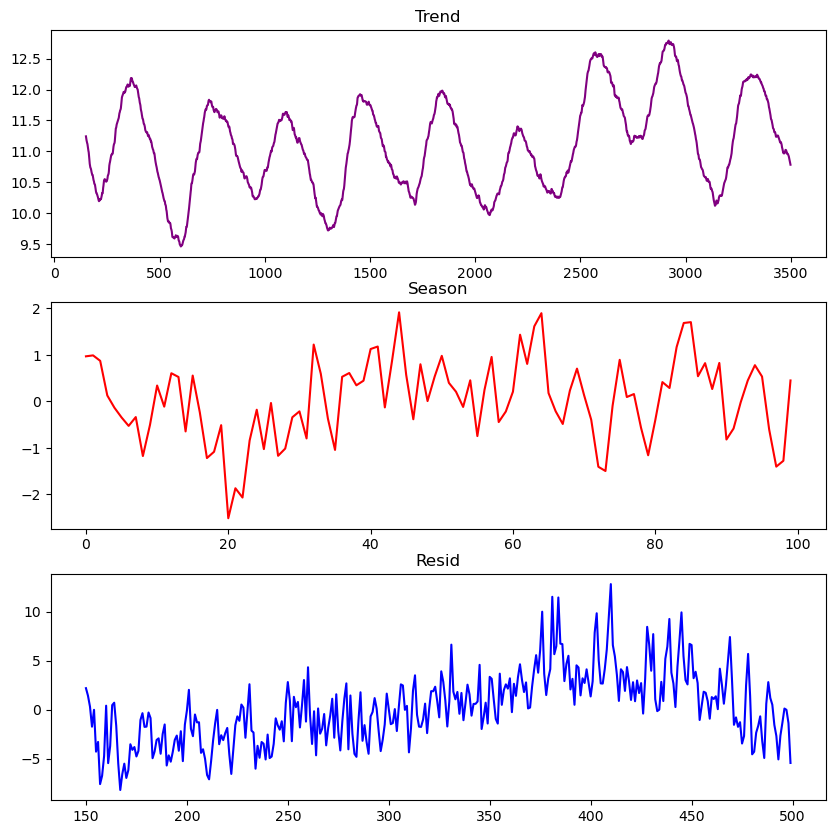

In [8]:
fig, axes = plt.subplots(3,1, figsize=(10,10))

axes[0].plot(Trend,c='purple')
axes[0].set_title('Trend')
axes[1].plot(Season[0:100],c='Red')
axes[1].set_title('Season')
axes[2].plot(Resid[0:500],c='blue')
axes[2].set_title('Resid')


## Stationarity check

In [9]:
def checkStationarity(data):
    pvalue = adfuller(data['Temp'])[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [10]:
checkStationarity(weather)

0.0002470826300360988


'pvalue=0.0002470826300360988. Data is Stationary. Proceed to model building'

## Smoothening

In [11]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pdct = model.fittedvalues 
    
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [12]:
alphas = [0.2, 0.6, 0.8]
models=[]
predicts={}
for a in alphas:
    m,df=simplesmoothing(weather.Temp,a)
    models.append(m)
    predicts[m]=df.forecast

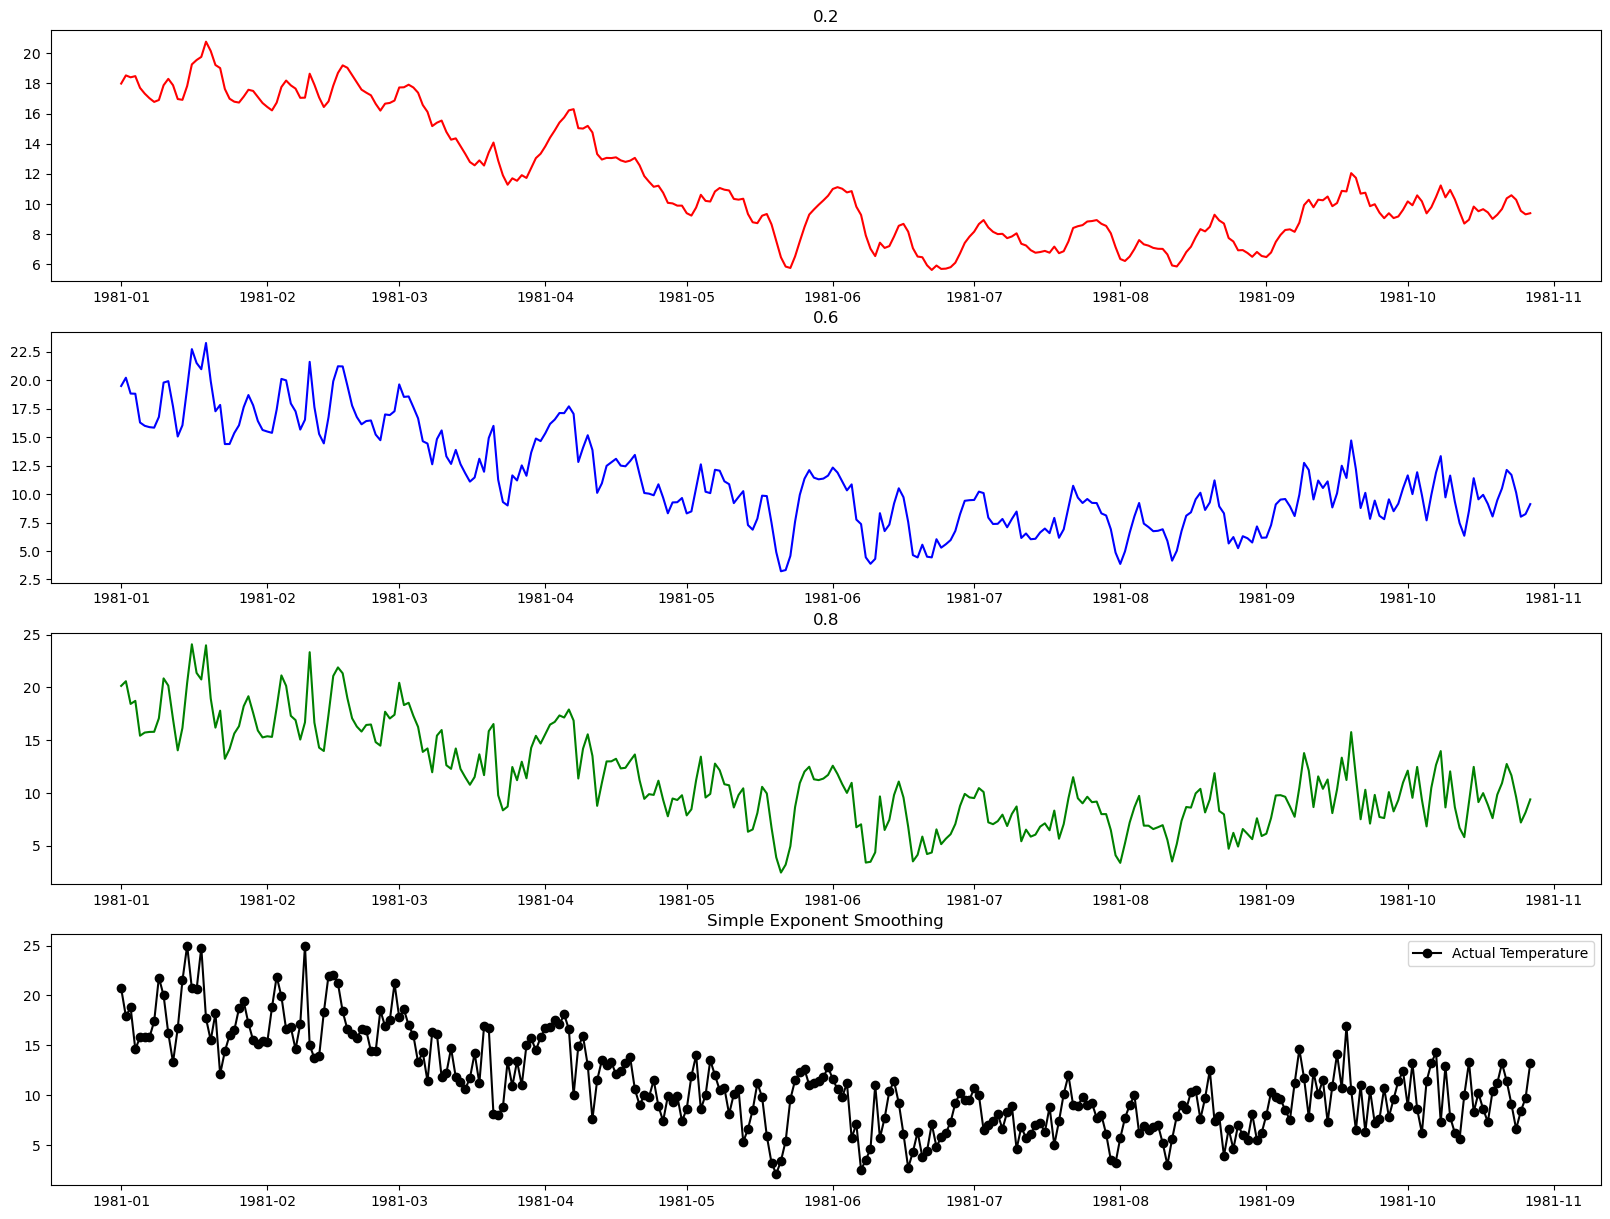

In [13]:
colors = ['red','blue','green','orange']


# plot the actual and forecast data
fig,ax = plt.subplots(4,1,figsize=(20,15))
plt.plot(weather.Temp[0:300], marker='o', color='black',label='Actual Temperature')

for i in range(len(alphas)):
    ax[i].plot(predicts[models[i]][0:300],c=colors[i])
    ax[i].set_title(alphas[i])
    

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

## Double exponent smoothening

In [14]:
alpha,beta=0.8,0.5

In [15]:
model2 = ExponentialSmoothing(weather,trend='additive').fit(smoothing_level=alpha, smoothing_trend=beta)

In [16]:
predicts=model2.fittedvalues

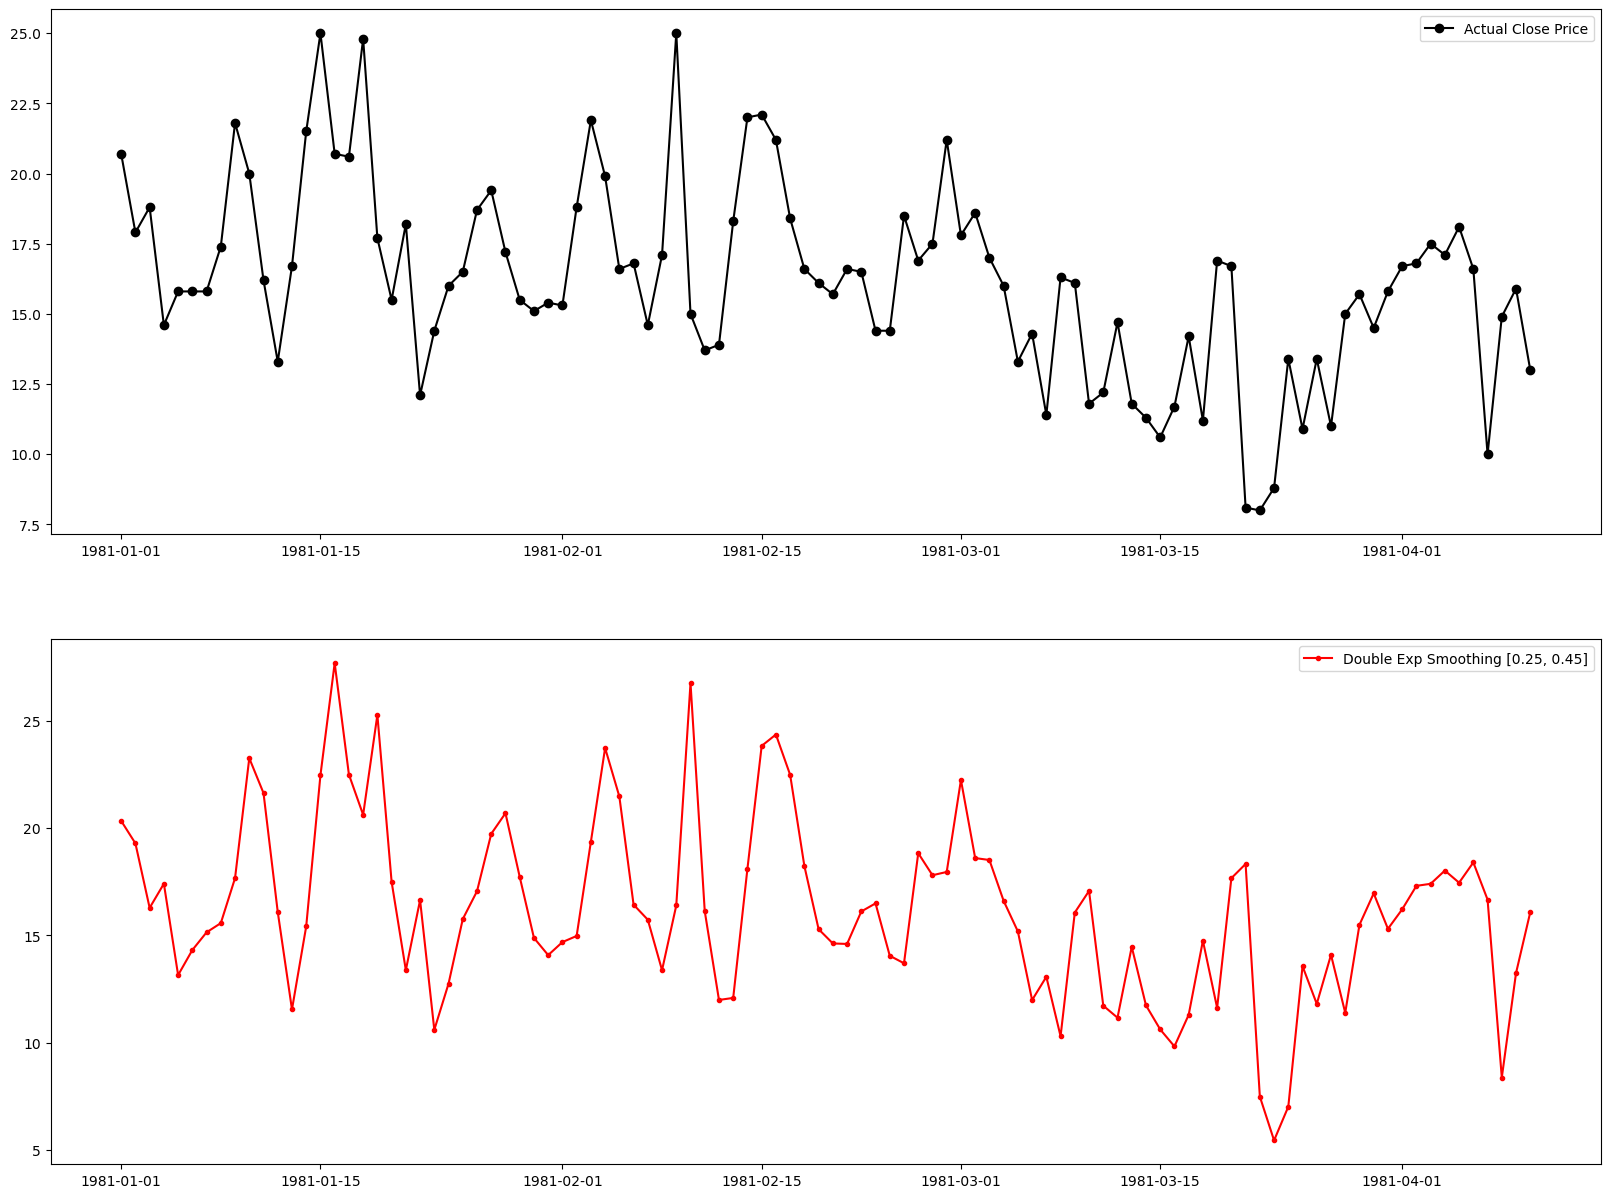

In [17]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax[0].plot(weather[0:100],marker='o',color='black',label='Actual Close Price')
ax[1].plot(predicts[0:100], marker='.',color='red',label='Double Exp Smoothing [0.25, 0.45]')
ax[0].legend()
ax[1].legend()

## Triple exponent smoothening

In [18]:
alpha,beta,gamma=0.8,0.5,0.5

In [19]:
model2 = ExponentialSmoothing(weather,trend='additive').fit(smoothing_level=alpha, smoothing_trend=beta,smoothing_seasonal=gamma)

In [20]:
predicts=model2.fittedvalues

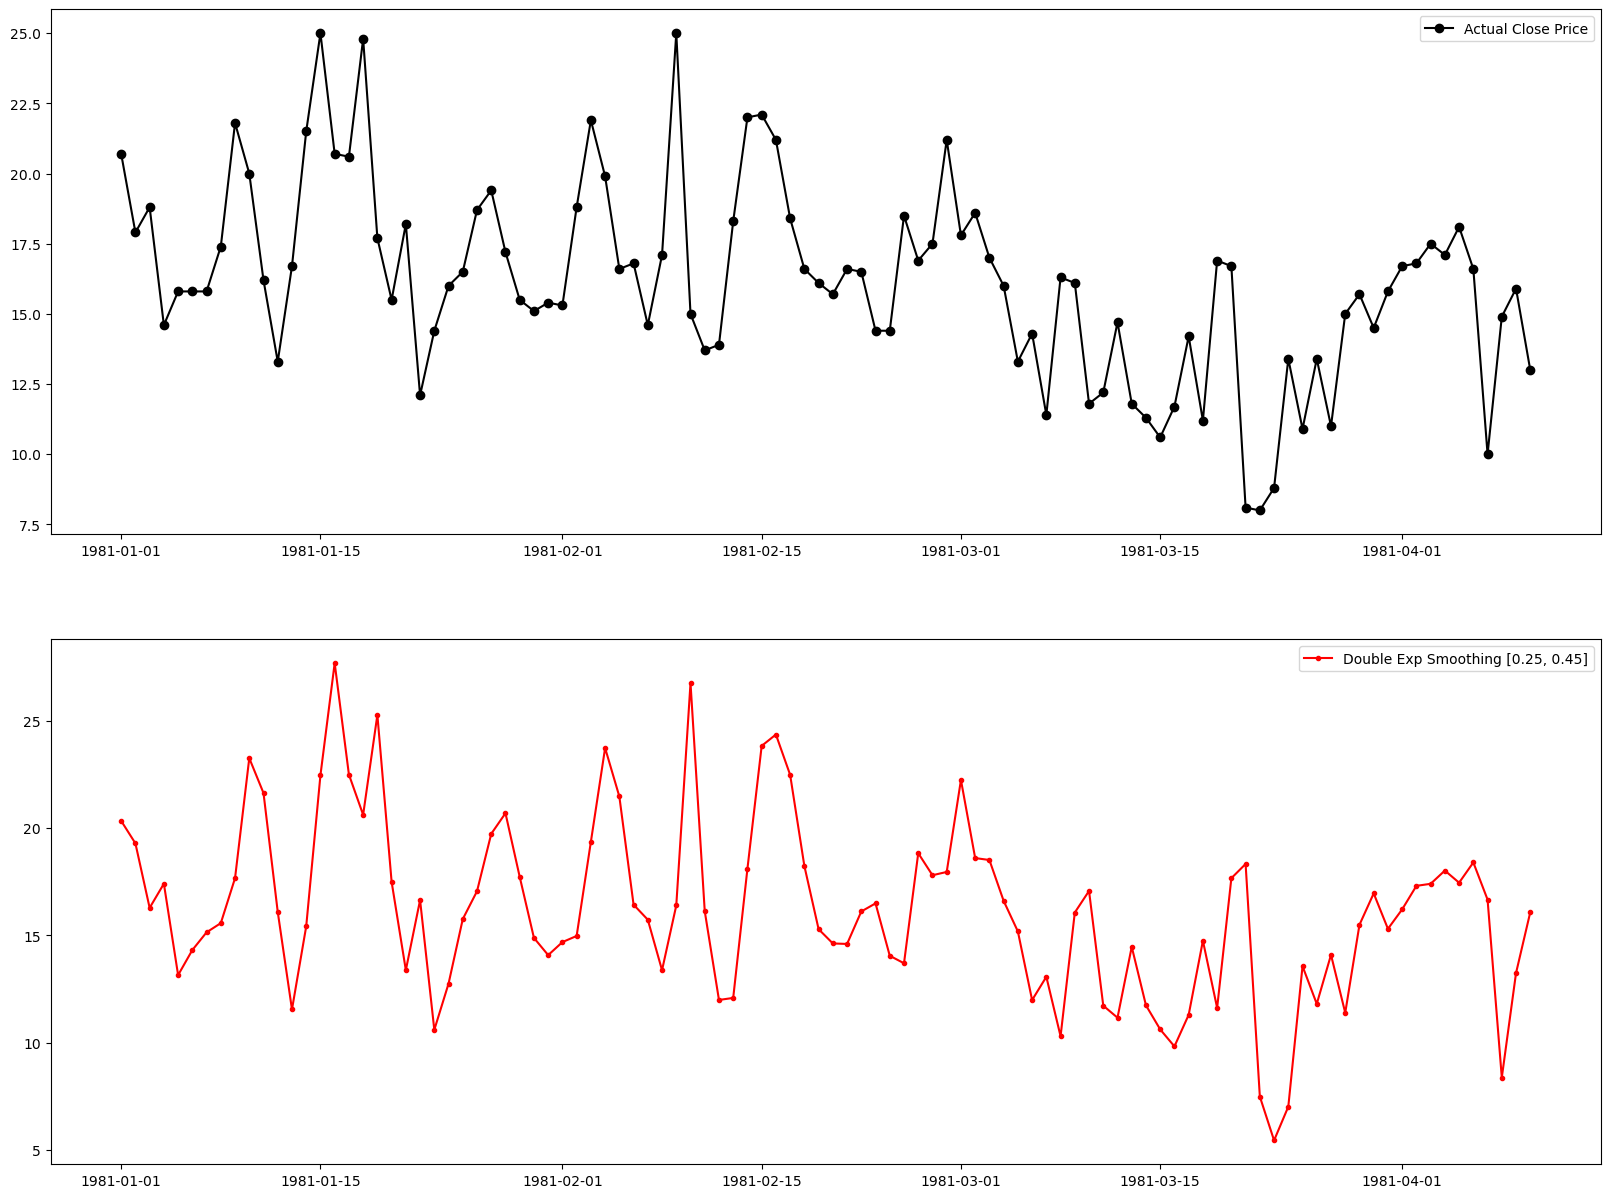

In [21]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax[0].plot(weather[0:100],marker='o',color='black',label='Actual Close Price')
ax[1].plot(predicts[0:100], marker='.',color='red',label='Double Exp Smoothing [0.25, 0.45]')
ax[0].legend()
ax[1].legend()

## Conclusion:

After analyzing the three graphs, it can be observed that the Triple Exponential Smoothing method appears to be the most suitable for accurately forecasting and analyzing the given data. Its ability to take into account trends, seasonality, and irregularities in the data make it a robust forecasting technique. Therefore, it can be concluded that Triple Exponential Smoothing is the most appropriate method for this dataset.
